# Extensions to Linear Models - Lab

## Introduction

In this lab, you'll practice many concepts you have learned so far, from adding interactions and polynomials to your model to AIC and BIC!

## Summary

You will be able to:
- Build a linear regression model with interactions and polynomial features 
- Use AIC and BIC to select the best value for the regularization parameter 


## Let's get started!

Import all the necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale

from sklearn.datasets import load_boston

## Look at a baseline boston housing data model

- Import the Boston housing dataset 
- Split the data into target (`y`) and predictors (`X`) -- ensure these both are DataFrames 
- Scale all the predictors using `scale`. Convert these scaled features into a DataFrame 
- Build at a baseline model using *scaled variables* as predictors. Use 5-fold cross-validation (set `random_state` to 1) and use the $R^2$ score to evaluate the model 

In [2]:
# Your code here
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
y = pd.DataFrame(data.target, columns=['MEDV']) # thousands
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [5]:
X_scaled = pd.DataFrame(scale(X), columns=X.columns)
X_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [6]:
model = LinearRegression().fit(X_scaled, y)

In [7]:
r2 = model.score(X_scaled, y)
print(f'R-Squared is {round(r2, 5)}')

R-Squared is 0.74064


In [8]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
cv_scores = cross_val_score(model, X_scaled, y, scoring='r2', cv=cv)
print('The cross val R-Squared scores are:')
print(cv_scores)
print(f'The mean R-Squared is: {round(cv_scores.mean(), 8)}')

The cross val R-Squared scores are:
[0.76341744 0.64681426 0.79214772 0.65075105 0.73525883]
The mean R-Squared is: 0.71767786


**Summary of 1st Model**

Looking at the cross_val_scores they range from a high of 0.71 to a low of -0.25.  That leads me to believe that the model is overfit because while 3 of the splits did a decent job predicting the data, 2 of the the splits did a TERRIBLE job predicting the data.

## Include interactions

Look at all the possible combinations of variables for interactions by adding interactions one by one to the baseline model. Next, evaluate that model using 5-fold cross-validation and store the $R^2$ to compare it with the baseline model.

Print the 7 most important interactions.

In [9]:
# Your code here
from itertools import combinations

column_combos = combinations(X_scaled.columns, 2)

combo_with_r2 = []

for col_1, col_2 in column_combos:
    X_scaled['interaction'] = X_scaled[col_1] * X_scaled[col_2]
    model_int = LinearRegression().fit(X_scaled, y)
    cv_scores = cross_val_score(model_int, X_scaled, y, scoring='r2', cv=cv)
    combo_with_r2.append(((col_1, col_2), cv_scores, cv_scores.mean()))
X_scaled.drop('interaction', axis=1, inplace=True)

In [10]:
combo_with_r2_sorted = sorted(combo_with_r2, key = lambda x: x[2], reverse=True)
for interaction in combo_with_r2_sorted[:7]:
    print(interaction)


(('RM', 'LSTAT'), array([0.85344777, 0.68368718, 0.83852128, 0.73617952, 0.80416991]), 0.7832011303731377)
(('RM', 'TAX'), array([0.80519853, 0.76642463, 0.82743626, 0.69653043, 0.78075162]), 0.7752682934529788)
(('RM', 'RAD'), array([0.78717109, 0.7725558 , 0.82429322, 0.69223436, 0.77433749]), 0.7701183903906148)
(('RM', 'PTRATIO'), array([0.79995541, 0.73896458, 0.8261275 , 0.67073904, 0.78218434]), 0.7635941716268362)
(('INDUS', 'RM'), array([0.80494473, 0.72188244, 0.78631852, 0.69966275, 0.77033058]), 0.7566278048616748)
(('NOX', 'RM'), array([0.78595358, 0.70262322, 0.81010249, 0.66629869, 0.76557946]), 0.7461114895799354)
(('RM', 'AGE'), array([0.7444085 , 0.68512517, 0.82576903, 0.68593138, 0.76947087]), 0.7421409891793223)


Write code to include the 7 most important interactions in your data set by adding 7 columns. Name the columns "var1_var2" with var1 and var2 the two variables in the interaction.

In [11]:
# Your code here
X_int = pd.DataFrame(index=X_scaled.index)
for interaction in combo_with_r2_sorted[:7]:
    int_name = interaction[0][0] + '_' + interaction[0][1]
    X_int[int_name] = X_scaled[interaction[0][0]] * X_scaled[interaction[0][1]]
X_int

,RM_LSTAT,RM_TAX,RM_RAD,RM_PTRATIO,INDUS_RM,NOX_RM,RM_AGE
0,-0.444930,-0.275757,-0.406574,-0.603547,-0.532772,-0.059659,-0.049646
1,-0.095668,-0.191813,-0.168607,-0.058883,-0.115279,-0.143814,0.071331
2,-1.550451,-1.266461,-1.113245,-0.388783,-0.761138,-0.949544,-0.340960
3,-1.383713,-1.124148,-0.765197,0.114875,-1.328183,-0.848901,-0.823092
4,-1.261136,-1.358947,-0.925023,0.138869,-1.605599,-1.026210,-0.628023
...,...,...,...,...,...,...,...
501,-0.183699,-0.352864,-0.431778,0.516840,0.050846,0.069466,0.008203
502,0.117473,0.188392,0.230524,-0.275937,-0.027146,-0.037088,-0.067769
503,-0.968263,-0.791131,-0.968061,1.158772,0.113998,0.155746,0.785456
504,-0.627925,-0.582868,-0.713222,0.853728,0.083988,0.114746,0.534818


## Include polynomials

Try polynomials of degrees 2, 3, and 4 for each variable, in a similar way you did for interactions (by looking at your baseline model and seeing how $R^2$ increases). Do understand that when going for a polynomial of 4, the particular column is raised to the power of 2 and 3 as well in other terms. We only want to include "pure" polynomials, so make sure no interactions are included. We want the result to return a list that contain tuples of the form:

`(var_name, degree, R2)`, so eg. `('DIS', 3, 0.732)` 

In [12]:
# Your code here
poly_results = []

for col in X_scaled.columns:
    for p in range(2,5):
        X_scaled[col+str(p)] = X_scaled[col]**p
        model_poly = LinearRegression().fit(X_scaled, y)
        cv_scores = cross_val_score(model_poly, X_scaled, y, scoring='r2', cv=cv)
        poly_results.append((col, p, cv_scores.mean()))
    for p in range(2,5):
        X_scaled.drop(col+str(p), axis=1, inplace=True)

For each variable, print out the maximum R2 possible when including Polynomials.

In [13]:
# Your code here
poly_results_sorted = sorted(poly_results, key = lambda x: x[2], reverse=True)
for term in poly_results_sorted[:6]:
    print(term)

('RM', 4, 0.800390933207674)
('RM', 2, 0.7822643336772177)
('LSTAT', 4, 0.7819527220940118)
('RM', 3, 0.7807282811018474)
('LSTAT', 3, 0.774019545194958)
('LSTAT', 2, 0.7718449087479488)


Which two variables seem to benefit most from adding polynomial terms?

**Polynomials to add**

RM^2
LSTAT^4

Add Polynomials for the two features that seem to benefit the most, as in have the best R squared compared to the baseline model. For each of the two features, raise to the Polynomial that generates the best result. Make sure to start from the data set `df_inter` so the final data set has both interactions and polynomials in the model.

In [14]:
# Your code here
X_poly = pd.DataFrame(index=X_scaled.index)
X_poly['RM2'] = X_scaled['RM']**2
X_poly['LSTAT2'] = X_scaled['LSTAT']**2
X_poly['LSTAT3'] = X_scaled['LSTAT']**3
X_poly['LSTAT4'] = X_scaled['LSTAT']**4
X_poly

,RM2,LSTAT2,LSTAT3,LSTAT4
0,0.171124,1.156834,-1.244247,1.338266
1,0.037743,0.242497,-0.119415,0.058805
2,1.645354,1.461022,-1.765977,2.134585
3,1.032871,1.853728,-2.523882,3.436308
4,1.509401,1.053705,-1.081630,1.110295
...,...,...,...,...
501,0.192998,0.174847,-0.073112,0.030572
502,0.055013,0.250851,-0.125638,0.062926
503,0.970146,0.966383,-0.950000,0.933895
504,0.526600,0.748747,-0.647892,0.560622


Check out your final data set and make sure that your interaction terms as well as your polynomial terms are included.

In [15]:
# Your code here
X_all = pd.concat([X_scaled, X_int, X_poly], axis=1)
X_all

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,RM_TAX,RM_RAD,RM_PTRATIO,INDUS_RM,NOX_RM,RM_AGE,RM2,LSTAT2,LSTAT3,LSTAT4
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,...,-0.275757,-0.406574,-0.603547,-0.532772,-0.059659,-0.049646,0.171124,1.156834,-1.244247,1.338266
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,...,-0.191813,-0.168607,-0.058883,-0.115279,-0.143814,0.071331,0.037743,0.242497,-0.119415,0.058805
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,...,-1.266461,-1.113245,-0.388783,-0.761138,-0.949544,-0.340960,1.645354,1.461022,-1.765977,2.134585
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,...,-1.124148,-0.765197,0.114875,-1.328183,-0.848901,-0.823092,1.032871,1.853728,-2.523882,3.436308
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,...,-1.358947,-0.925023,0.138869,-1.605599,-1.026210,-0.628023,1.509401,1.053705,-1.081630,1.110295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,...,-0.352864,-0.431778,0.516840,0.050846,0.069466,0.008203,0.192998,0.174847,-0.073112,0.030572
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,...,0.188392,0.230524,-0.275937,-0.027146,-0.037088,-0.067769,0.055013,0.250851,-0.125638,0.062926
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,...,-0.791131,-0.968061,1.158772,0.113998,0.155746,0.785456,0.970146,0.966383,-0.950000,0.933895
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,...,-0.582868,-0.713222,0.853728,0.083988,0.114746,0.534818,0.526600,0.748747,-0.647892,0.560622


## Full model R-squared

Check out the R-squared of the full model.

In [16]:
# Your code here
model_all = LinearRegression().fit(X_all, y)
model_all.score(X_all, y)

0.8369412119005779

## Find the best Lasso regularization parameter

You learned that when using Lasso regularization, your coefficients shrink to 0 when using a higher regularization parameter. Now the question is which value we should choose for the regularization parameter. 

This is where the AIC and BIC come in handy! We'll use both criteria in what follows and perform cross-validation to select an optimal value of the regularization parameter $alpha$ of the Lasso estimator.

Read the page here: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html and create a similar plot as the first one listed on the page. 

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

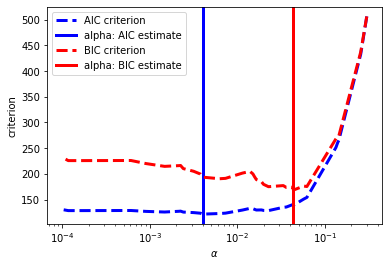

Alpha for BIC 0.04360488110715309
Alpha for AIC 0.003922297752139346


In [18]:
# Your code here 

# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4

model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(X_all, y)
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_all, y)
alpha_aic_ = model_aic.alpha_

def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(model.alphas_ + EPSILON, criterion_, '--', color=color,
                 linewidth=3, label='%s criterion' % name)
    plt.axvline(model.alpha_ + EPSILON, color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel(r'$\alpha$')
    plt.ylabel('criterion')


plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.show()

print(f'Alpha for BIC {alpha_bic_}')
print(f'Alpha for AIC {alpha_aic_}')

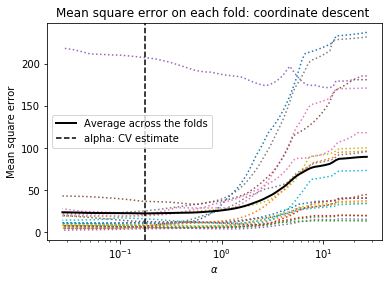

Alpha from LassoCV 0.17644378042324518


In [19]:
model = LassoCV(cv=20).fit(X_all, y)

# Display results
plt.figure()
plt.semilogx(model.alphas_ + EPSILON, model.mse_path_, ':')
plt.plot(model.alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_ + EPSILON, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')
plt.show()

alpha_lasso_cv = model.alpha_

print(f'Alpha from LassoCV {model.alpha_}')

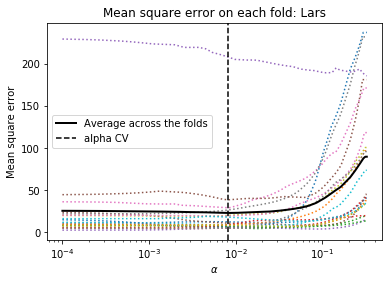

Alpha from LassoLarsCV 0.008094955057030359


In [20]:
model = LassoLarsCV(cv=20).fit(X_all, y)

# Display results
plt.figure()
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_, linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars')
plt.axis('tight')

plt.show()

alpha_lars_cv = model.alpha_

print(f'Alpha from LassoLarsCV {model.alpha_}')

## Analyze the final result

Finally, use the best value for the regularization parameter according to AIC and BIC, and compare R-squared and MSE using train-test split. Compare with the baseline model.

In [21]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [22]:
# Split X_scaled and y into training and test sets
# Set random_state to 1
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)

# Code for baseline model
linreg = LinearRegression().fit(X_train, y_train)

x_train_r2 = linreg.score(X_train, y_train)
mse = mean_squared_error(y_train, linreg.predict(X_train))
# Print R2 and MSE
print(f'R2 {x_train_r2}')
print(f'MSE {mse}')

R2 0.7168057552393374
MSE 22.477983821877896


In [23]:
# Split df_inter and y into training and test sets
# Set random_state to 1

df_inter = pd.concat([X_scaled, X_int], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_inter, y, random_state=1)

# Code for lasso with alpha from AIC
lasso = Lasso(alpha=alpha_aic_).fit(X_train, y_train)


# Print R2 and MSE
x_train_r2 = lasso.score(X_train, y_train)
mse = mean_squared_error(y_train, lasso.predict(X_train))
# Print R2 and MSE
print(f'R2 {x_train_r2}')
print(f'MSE {mse}')

R2 0.8067797865084811
MSE 15.336472803650183


In [24]:
# Code for lasso with alpha from BIC
lasso = Lasso(alpha=alpha_bic_).fit(X_train, y_train)

# Print R2 and MSE
x_train_r2 = lasso.score(X_train, y_train)
mse = mean_squared_error(y_train, lasso.predict(X_train))
# Print R2 and MSE
print(f'R2 {x_train_r2}')
print(f'MSE {mse}')

R2 0.8042619123821044
MSE 15.5363240892088


In [25]:
lasso = Lasso(alpha=alpha_lasso_cv).fit(X_train, y_train)

# Print R2 and MSE
x_train_r2 = lasso.score(X_train, y_train)
mse = mean_squared_error(y_train, lasso.predict(X_train))
# Print R2 and MSE
print(f'R2 {x_train_r2}')
print(f'MSE {mse}')

R2 0.7929826905708519
MSE 16.431590042127358


In [26]:
lasso = Lasso(alpha=alpha_lars_cv).fit(X_train, y_train)

# Print R2 and MSE
x_train_r2 = lasso.score(X_train, y_train)
mse = mean_squared_error(y_train, lasso.predict(X_train))
# Print R2 and MSE
print(f'R2 {x_train_r2}')
print(f'MSE {mse}')

R2 0.8066909182688455
MSE 15.343526544641625


## Level up (Optional)

### Create a Lasso path

From this section, you know that when using lasso, more parameters shrink to zero as your regularization parameter goes up. In Scikit-learn there is a function `lasso_path()` which visualizes the shrinkage of the coefficients while $alpha$ changes. Try this out yourself!

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

### AIC and BIC for subset selection
This notebook shows how you can use AIC and BIC purely for feature selection. Try this code out on our Boston housing data!

https://xavierbourretsicotte.github.io/subset_selection.html

## Summary

Congratulations! You now know how to create better linear models and how to use AIC and BIC for both feature selection and to optimize your regularization parameter when performing Ridge and Lasso. 